# Template Matching
> 這是最基本的物件追蹤, 如果要使用這種方式比對的圖片要完全一模一樣才有辦法比對到
> 對應的方式是透過將已知的小照片沿著大照片一格一格掃過去, 直到找到一樣的圖案

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

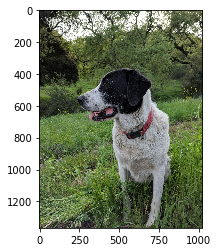

In [7]:
# 先讀取練習的照片
full = cv2.imread("../../Opencv/Computer-Vision-with-Python/DATA/sammy.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

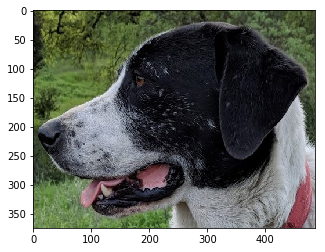

In [8]:
# 讀取需找尋的照片
face = cv2.imread("../../Opencv/Computer-Vision-with-Python/DATA/sammy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

> 現在我們要在full的照片中找尋face這個相同的照片
> 我們可以利用以下的不同的 Method來找

In [10]:
# 以下為六種不同的比較方式
# 這邊會透過 eval 的方式將String 轉乘 python function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

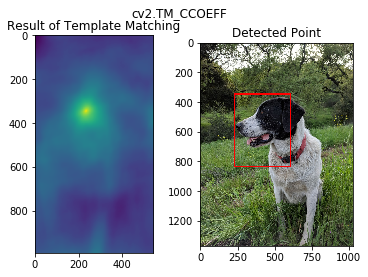

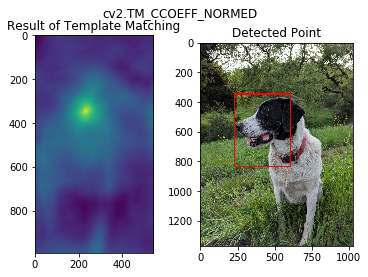

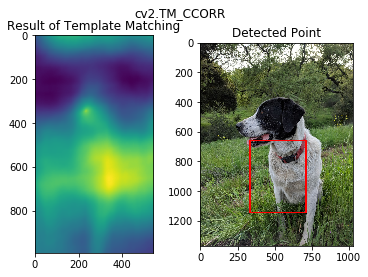

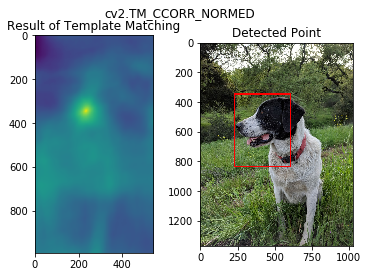

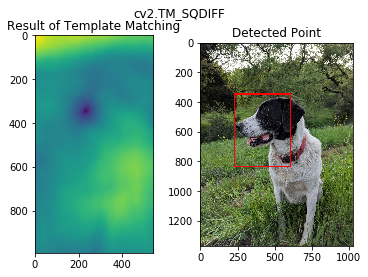

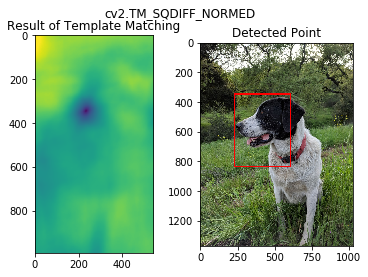

In [13]:
width = face.shape[0]
height= face.shape[1]

for m in methods:
    full_copy = full.copy()
    
    # 透過 eval 來定義我們要使用的 Method
    method = eval(m)
    
    # 建立找尋的Function
    # 基本上這邊就是定義我們要用哪個方式且哪張照片在哪張照片上面進行比對
    res = cv2.matchTemplate(full_copy,face,method)
    
    # 找到後需要回傳出最大與最小的值與他們的位置
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 我們可以透過找到的位子來幫我們定義方塊的左上角
    # 這邊需要注意的是只有以下兩種method才是使用 min_loc
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    # 因我們已知我們在找尋照片的大小, 所以可以透過原本照片大小算出框框的右下角
    bottom_right = (top_left[0] + width , top_left[1] + height)
    
    # 就跟之前的方式一樣, 透過cv2.rectangle在照片上面畫方塊
    cv2.rectangle(full_copy,top_left,bottom_right,255,10)
        
    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    
    